<a href="https://colab.research.google.com/github/hectorcr2001/computacional/blob/main/problema1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import math

def reescalarpos(x):
  return x**1.496*10**(11)


def modulo(x,y):
  return math.sqrt(x*x+y*y)

Prefiere un punto de vista heliocentrista o geocentrista (escriba h o g)
g


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in double_scalars


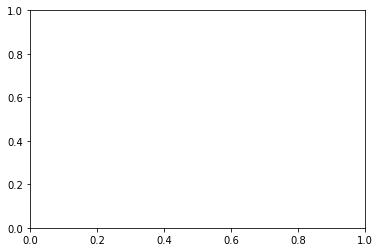

In [7]:
from re import X
from numpy.lib.twodim_base import mask_indices
import numpy as np
import matplotlib.pyplot as plt
import math


# valores iniciales
n=10000 #numero de iteraciones
m=10 #numero de planetas
h=0.1 #paso del tiempo

#inicializar las variables para el algoritmo (las de los ficheros ya están reescaladas)
t=0
ma=np.genfromtxt("/content/drive/MyDrive/Uni/Compu/masas.txt") #masa
rx=np.genfromtxt("/content/drive/MyDrive/Uni/Compu/distancias.txt") #distancia al sol
ry=np.zeros(m)
vx=np.zeros(m)
vy=np.genfromtxt("/content/drive/MyDrive/Uni/Compu/velocidad.txt") #velocidad
ax=np.zeros(m) #aceleracion
ay=np.zeros(m)
wx=np.zeros(m) #variable que se define en el algoritmo
wy=np.zeros(m)

#inicializar las variables para la comprobación de los periodos
pt=np.genfromtxt("/content/drive/MyDrive/Uni/Compu/periodos.txt")*365
ps=np.zeros(m-1)
psuma=np.zeros(m-1)
cont=np.zeros(m-1)
rya=np.zeros(m)





print("Prefiere un punto de vista heliocentrista o geocentrista (escriba h o g)")
ref=input()
if (ref=="g"):
  rx=rx-1



f = open("planets_data.txt", "w")
g= open("result_periodos.txt","w")
#calcula las aceleraciones iniciales
for i in range(m):
    for j in range(m):
      if (i != j):
        ax[i]=ax[i]-ma[j]*(rx[i]-rx[j])/(modulo(rx[i]-rx[j],ry[i]-ry[j]))**3
        ay[i]=ay[i]-ma[j]*(ry[i]-ry[j])/(modulo(rx[i]-rx[j],ry[i]-ry[j]))**3
    #print("ax= ", ax[i], "ay= ", ay[i])
#recorre el algoritmo n veces
for k in range(n):
  for i in range(m):
    rya[i]=ry[i]
    rx[i]=rx[i]+h*vx[i]+(h*h*0.5)*ax[i]
    ry[i]=ry[i]+h*vy[i]+(h*h*0.5)*ay[i]
    wx[i]=vx[i]+(h*0.5)*ax[i]
    wy[i]=vy[i]+(h*0.5)*ay[i]

    
    print(rx[i], ",",ry[i], file=f) #escribe las posiciones en un archivo

  print("", file=f)
  ax=np.zeros(m)
  ay=np.zeros(m) 
  for i in range(m):
    for j in range(m):
      if (i != j):
        ax[i]=ax[i]-ma[j]*(rx[i]-rx[j])/(modulo(rx[i]-rx[j],ry[i]-ry[j]))**3
        ay[i]=ay[i]-ma[j]*(ry[i]-ry[j])/(modulo(rx[i]-rx[j],ry[i]-ry[j]))**3
  for i in range(m):
    vx[i]=wx[i]+(h*0.5)*(ax[i])
    vy[i]=wy[i]+(h*0.5)*(ay[i])
  
  t=t+h

  #comprobación periodos
  for i in range(m-1):
    if (rya[i+1]<0 & 0<ry[i+1]):
      cont[i]=cont[i]+1
      psuma[i]=psuma[i]+ps[i]
      ps[i]=t-psuma[i]

for i in range(m-1):
  print(i," periodo medio", psuma[i]/(cont[i]*24*3600*1.99*(10**(-7))),"\n","periodo real: ",pt[i],"\n", "proporción: ",psuma[i]/(cont[i]*pt[i]*24*3600*1.99*(10**(-7))),"\n",file=g)

f.close()
g.close()


In [ ]:
# ================================================================================
# ANIMACION SISTEMA SOLAR
#
# Genera una animación a partir de un fichero de datos con las posiciones
# de los planetas en diferentes instantes de tiempo.
# 
# El fichero debe estructurarse de la siguiente forma:
# 
#   x1_1, y1_1
#   x2_1, y2_1
#   x3_1, y3_1
#   (...)
#   xN_1, yN_1
#   
#   x1_2, y1_2
#   x2_2, y2_2
#   x3_2, y3_2
#   (...)
#   xN_2, yN_2
#
#   x1_3, y1_3
#   x2_3, y2_3
#   x3_3, y3_3
#   (...)
#   xN_3, yN_3
#   
#   (...)
#
# donde xi_j es la componente x del planeta i-ésimo en el instante de
# tiempo j-ésimo, e yi_j lo mismo en la componente y. El programa asume que
# el nº de planetas es siempre el mismo.
# ¡OJO! Los datos están separados por comas.
# 
# Si solo se especifica un instante de tiempo, se genera una imagen en pdf
# en lugar de una animación
#
# Se puede configurar la animación cambiando el valor de las variables
# de la sección "Parámetros"
#
# ================================================================================

# Importa los módulos necesarios
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle
import numpy as np

# Parámetros
# ========================================
file_in = "planets_data.txt" # Nombre del fichero de datos
file_out = "planetas" # Nombre del fichero de salida (sin extensión)

# Límites de los ejes X e Y
x_min = -5
x_max = 5
y_min = -5
y_max = 5

interval = 100 # Tiempo entre fotogramas en milisegundos
show_trail = True # Muestra la "estela" del planeta
trail_width = 1 # Ancho de la estela
save_to_file = True # False: muestra la animación por pantalla,
                     # True: la guarda en un fichero
dpi = 150 # Calidad del vídeo de salida (dots per inch)

# Radio del planeta, en las mismas unidades que la posición
# Puede ser un número (el radio de todos los planetas) o una lista con
# el radio de cada uno
planet_radius = 0.3
#planet_radius = [0.5, 0.7, 1.1]


# Lectura del fichero de datos
# ========================================
# Lee el fichero a una cadena de texto
with open(file_in, "r") as f:
    data_str = f.read()

# Inicializa la lista con los datos de cada fotograma.
# frames_data[j] contiene los datos del fotograma j-ésimo
frames_data = list()

# Itera sobre los bloques de texto separados por líneas vacías
# (cada bloque corresponde a un instante de tiempo)
for frame_data_str in data_str.split("\n\n"):
    # Inicializa la lista con la posición de cada planeta
    frame_data = list()

    # Itera sobre las líneas del bloque
    # (cada línea da la posición de un planta)
    for planet_pos_str in frame_data_str.split("\n"):
        # Lee la componente x e y de la línea
        planet_pos = np.fromstring(planet_pos_str, sep=",")
        # Si la línea no está vacía, añade planet_pos a la lista de 
        # posiciones del fotograma
        if planet_pos.size > 0:
            frame_data.append(np.fromstring(planet_pos_str, sep=","))

    # Añade los datos de este fotograma a la lista
    frames_data.append(frame_data)

# El número de planetas es el número de líneas en cada bloque
# Lo calculamos del primer bloque
nplanets = len(frames_data[0])


# Creación de la animación/gráfico
# ========================================
# Crea los objetos figure y axis
fig, ax = plt.subplots()

# Define el rango de los ejes
ax.axis("equal")  # Misma escala para ejes X e Y
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Si solo se ha dado un radio para todos los planetas, conviértelo a una
# lista con todos los elementos iguales
if not hasattr(planet_radius, "__iter__"):
    planet_radius = planet_radius*np.ones(nplanets)
# En caso contrario, comprueba que el nº de radios coincide con el
# nº de planetas y devuelve error en caso contrario
else:
    if not nplanets == len(planet_radius):
        raise ValueError(
                "El número de radios especificados no coincide con el número "
                "de planetas")

# Representa el primer fotograma
# Pinta un punto en la posición de cada paneta y guarda el objeto asociado
# al punto en una lista
planet_points = list()
planet_trails = list()
for planet_pos, radius in zip(frames_data[0], planet_radius):
    x, y = planet_pos
    #planet_point, = ax.plot(x, y, "o", markersize=10)
    planet_point = Circle((x, y), radius)
    ax.add_artist(planet_point)
    planet_points.append(planet_point)

    # Inicializa las estelas (si especificado en los parámetros)
    if show_trail:
        planet_trail, = ax.plot(
                x, y, "-", linewidth=trail_width,
                color=planet_points[-1].get_facecolor())
        planet_trails.append(planet_trail)
 
# Función que actualiza la posición de los planetas en la animación 
def update(j_frame, frames_data, planet_points, planet_trails, show_trail):
    # Actualiza la posición del correspondiente a cada planeta
    for j_planet, planet_pos in enumerate(frames_data[j_frame]):
        x, y = planet_pos
        planet_points[j_planet].center = (x, y)

        if show_trail:
            xs_old, ys_old = planet_trails[j_planet].get_data()
            xs_new = np.append(xs_old, x)
            ys_new = np.append(ys_old, y)

            planet_trails[j_planet].set_data(xs_new, ys_new)

    return planet_points + planet_trails

def init_anim():
    # Clear trails
    if show_trail:
        for j_planet in range(nplanets):
            planet_trails[j_planet].set_data(list(), list())

    return planet_points + planet_trails

# Calcula el nº de frames
nframes = len(frames_data)

# Si hay más de un instante de tiempo, genera la animación
if nframes > 1:
    # Info sobre FuncAnimation: https://matplotlib.org/stable/api/animation_api.html
    animation = FuncAnimation(
            fig, update, init_func=init_anim,
            fargs=(frames_data, planet_points, planet_trails, show_trail),
            frames=len(frames_data), blit=True, interval=interval)

    # Muestra por pantalla o guarda según parámetros
    if save_to_file:
        animation.save("{}.mp4".format(file_out), dpi=dpi)
    else:
        plt.show()
# En caso contrario, muestra o guarda una imagen
else:
    # Muestra por pantalla o guarda según parámetros
    if save_to_file:
        fig.savefig("{}.pdf".format(file_out))
    else:
        plt.show()